Transition matrix (rows sum to 1):
[[0.98708227 0.01291773]
 [0.04166358 0.95833642]]
Model converged: True
Converged in 40 iterations (tol = 0.01 )
State means: [ 0.00071555 -0.00128752]
State stds:  [0.00636463 0.0172233 ]
Bull state: 0, Bear state: 1


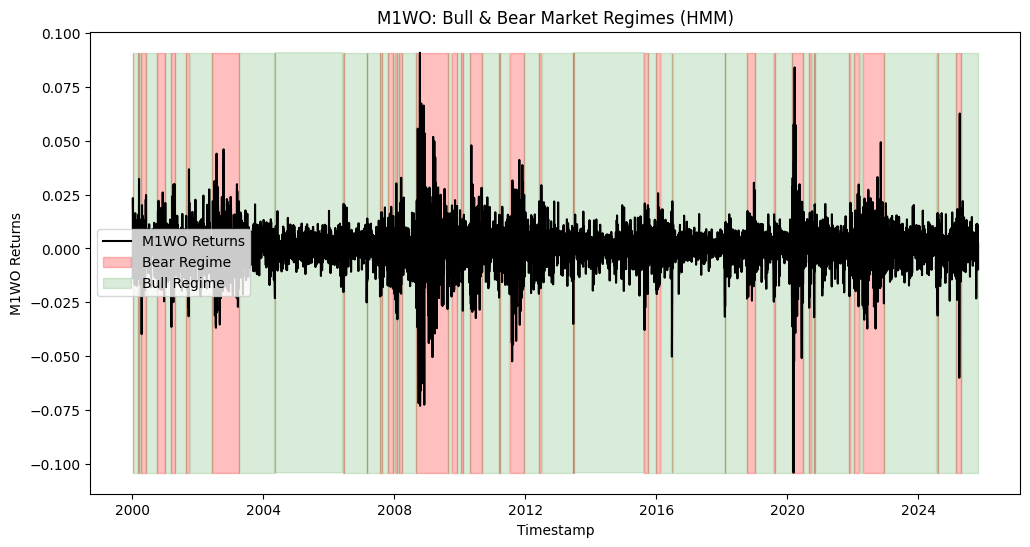

In [1]:
import pandas as pd
import numpy as np
import os, sys
sys.path.insert(0, os.path.abspath('../..'))
import source.data_handling.data_preparation as dp
import source.Classification.models_classification as modl
from source.plot_functions.plot_functions_classification import (plot_price_regime_with_error_types_a4,plot_prob_with_boot_ci_and_error_rugs_a4, plot_expanding_accuracy_with_boot_ci_a4,print_metrics_with_bootstrap_uncertainty_and_ci)

import numpy as np
import pandas as pd
df = dp.create_classification_data(quiet=False)
feature_cols = ["CL1","M1WO","SXXT","SPX","NKY","SPTR","EUR003M","FEDL01","GC1","V2X","MOVE","VIX","USYC2Y10","VXJ"]
refit_every = 1

In [2]:

y_true, y_pred,y_prob, dates = modl.expanding_oos_refit_every_cls(
    df,
    feature_cols=feature_cols,
    target_col="state",
    start_oos="2010-01-01",
    start_date="2000-01-05",
    min_train=120,
    refit_every=refit_every,      # fit monthly (approx 30 trading days)
    model="logit",          # "logit" | "rf" | "tabpfn25" | "mantis_head" | "mantis_rf_head"
    seed=42,
    quiet=False,
)
pred_draws_df_1 = pd.read_csv("../../Data/ModelData/Classification/pred_draws_df_logit.csv", parse_dates=["timestamp"], index_col=0)
# add y_true y_pred and dates as a dataframe new one
pred_df_1 = pd.DataFrame({
    "timestamp": dates,
    "y_true": y_true,
    "y_pred": y_pred,
    "pred_prob": y_prob
})
pred_df_1 = pred_df_1.merge(df[["timestamp", "M1WO_O"]], on="timestamp", how="left")
pred_df_1.to_csv("../../Data/ModelData/Classification/pred_df_loop_logit.csv")

CPU worker processing block starting at index 0, date 2010-01-01
CPU worker processing block starting at index 1, date 2010-01-04
CPU worker processing block starting at index 2, date 2010-01-05
CPU worker processing block starting at index 3, date 2010-01-06
CPU worker processing block starting at index 4, date 2010-01-07
CPU worker processing block starting at index 5, date 2010-01-08
CPU worker processing block starting at index 6, date 2010-01-11
CPU worker processing block starting at index 7, date 2010-01-12
CPU worker processing block starting at index 8, date 2010-01-13
CPU worker processing block starting at index 9, date 2010-01-14
CPU worker processing block starting at index 10, date 2010-01-15
CPU worker processing block starting at index 11, date 2010-01-18
CPU worker processing block starting at index 12, date 2010-01-19
CPU worker processing block starting at index 13, date 2010-01-20
CPU worker processing block starting at index 14, date 2010-01-21
CPU worker processin

In [ ]:
print_metrics_with_bootstrap_uncertainty_and_ci(
    y_true=y_true,
    y_pred=y_pred,
    y_prob=y_prob,
    pred_draws_df=pred_draws_df_1,
    threshold=0.5,
    p1_col="p1"
)
# logistic regression


Model Performance (point + bootstrap mean/std + CI)
--------------------------------------------------------------------------------------
Metric         Point  Boot mean   Boot std     CI lo     CI hi   Nboot
--------------------------------------------------------------------------------------
Accuracy      0.8879     0.8785     0.0116    0.8629    0.8988      40
Precision     0.6683     0.6517     0.0335    0.6064    0.7120      40
Recall        0.8348     0.8073     0.0316    0.7506    0.8524      40
F1            0.7423     0.7203     0.0207    0.6845    0.7562      40
ROC AUC       0.9481     0.9355     0.0077    0.9243    0.9481      40
--------------------------------------------------------------------------------------
CI level: 90%  |  threshold: 0.50



In [4]:

y_true, y_pred,y_prob, dates = modl.expanding_oos_refit_every_cls(
    df,
    feature_cols=feature_cols,
    target_col="state",
    start_oos="2010-01-01",
    start_date="2000-01-05",
    min_train=120,
    refit_every=refit_every,      # fit monthly (approx 30 trading days)
    model="rf",          # "logit" | "rf" | "tabpfn25" | "mantis_head" | "mantis_rf_head"
    seed=42,
    quiet=False,
)
pred_draws_df_2 = pd.read_csv("../../Data/ModelData/Classification/pred_draws_df_rf.csv", parse_dates=["timestamp"], index_col=0)
# add y_true y_pred and dates as a dataframe new one
pred_df_2 = pd.DataFrame({
    "timestamp": dates,
    "y_true": y_true,
    "y_pred": y_pred,
    "pred_prob": y_prob
})
pred_df_2 = pred_df_2.merge(df[["timestamp", "M1WO_O"]], on="timestamp", how="left")
pred_df_2.to_csv("../../Data/ModelData/Classification/pred_df_loop_rf.csv")

CPU worker processing block starting at index 0, date 2010-01-01
CPU worker processing block starting at index 1, date 2010-01-04
CPU worker processing block starting at index 2, date 2010-01-05
CPU worker processing block starting at index 3, date 2010-01-06
CPU worker processing block starting at index 4, date 2010-01-07
CPU worker processing block starting at index 5, date 2010-01-08
CPU worker processing block starting at index 6, date 2010-01-11
CPU worker processing block starting at index 7, date 2010-01-12
CPU worker processing block starting at index 8, date 2010-01-13
CPU worker processing block starting at index 9, date 2010-01-14
CPU worker processing block starting at index 10, date 2010-01-15
CPU worker processing block starting at index 11, date 2010-01-18
CPU worker processing block starting at index 12, date 2010-01-19
CPU worker processing block starting at index 13, date 2010-01-20
CPU worker processing block starting at index 14, date 2010-01-21
CPU worker processin

In [ ]:
print_metrics_with_bootstrap_uncertainty_and_ci(
    y_true=y_true,
    y_pred=y_pred,
    y_prob=y_prob,
    pred_draws_df=pred_draws_df_2,
    threshold=0.5,
    p1_col="p1"
)
# random forest


Model Performance (point + bootstrap mean/std + CI)
--------------------------------------------------------------------------------------
Metric         Point  Boot mean   Boot std     CI lo     CI hi   Nboot
--------------------------------------------------------------------------------------
Accuracy      0.9240     0.9049     0.0050    0.8989    0.9127      40
Precision     0.8043     0.7979     0.0224    0.7629    0.8339      40
Recall        0.8023     0.6817     0.0241    0.6407    0.7197      40
F1            0.8033     0.7348     0.0146    0.7110    0.7580      40
ROC AUC       0.9655     0.9382     0.0059    0.9281    0.9463      40
--------------------------------------------------------------------------------------
CI level: 90%  |  threshold: 0.50



In [6]:

y_true, y_pred,y_prob, dates = modl.expanding_oos_refit_every_cls(
    df,
    feature_cols=feature_cols,
    target_col="state",
    start_oos="2010-01-01",
    start_date="2000-01-05",
    min_train=120,
    refit_every=refit_every,      # fit monthly (approx 30 trading days)
    model="tabpfn25",          # "logit" | "rf" | "tabpfn25" | "mantis_head" | "mantis_rf_head"
    seed=42,
    quiet=False,
)
# add y_true y_pred and dates as a dataframe new one
pred_draws_df_3 = pd.read_csv("../../Data/ModelData/Classification/pred_draws_df_tabpfn25.csv", parse_dates=["timestamp"], index_col=0)

pred_df_3 = pd.DataFrame({
    "timestamp": dates,
    "y_true": y_true,
    "y_pred": y_pred,
    "pred_prob": y_prob
})
pred_df_3 = pred_df_3.merge(df[["timestamp", "M1WO_O"]], on="timestamp", how="left")
pred_df_3.to_csv("../../Data/ModelData/Classification/pred_df_loop_tabpfn25.csv")

[tabpfn25] refit at 2010-01-01 using data up to 2009-12-31 | predicted 1 days
[tabpfn25] refit at 2010-01-04 using data up to 2010-01-01 | predicted 1 days
[tabpfn25] refit at 2010-01-05 using data up to 2010-01-04 | predicted 1 days
[tabpfn25] refit at 2010-01-06 using data up to 2010-01-05 | predicted 1 days
[tabpfn25] refit at 2010-01-07 using data up to 2010-01-06 | predicted 1 days
[tabpfn25] refit at 2010-01-08 using data up to 2010-01-07 | predicted 1 days
[tabpfn25] refit at 2010-01-11 using data up to 2010-01-08 | predicted 1 days
[tabpfn25] refit at 2010-01-12 using data up to 2010-01-11 | predicted 1 days
[tabpfn25] refit at 2010-01-13 using data up to 2010-01-12 | predicted 1 days
[tabpfn25] refit at 2010-01-14 using data up to 2010-01-13 | predicted 1 days
[tabpfn25] refit at 2010-01-15 using data up to 2010-01-14 | predicted 1 days
[tabpfn25] refit at 2010-01-18 using data up to 2010-01-15 | predicted 1 days
[tabpfn25] refit at 2010-01-19 using data up to 2010-01-18 | pre

error uploading: HTTPSConnectionPool(host='eu.i.posthog.com', port=443): Max retries exceeded with url: /batch/ (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x000001D5A60FFAA0>: Failed to resolve 'eu.i.posthog.com' ([Errno 11001] getaddrinfo failed)"))
error uploading: HTTPSConnectionPool(host='eu.i.posthog.com', port=443): Max retries exceeded with url: /batch/ (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x000001D5A611A630>: Failed to resolve 'eu.i.posthog.com' ([Errno 11001] getaddrinfo failed)"))
error uploading: HTTPSConnectionPool(host='eu.i.posthog.com', port=443): Max retries exceeded with url: /batch/ (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x000001D54CD89850>: Failed to resolve 'eu.i.posthog.com' ([Errno 11001] getaddrinfo failed)"))


[tabpfn25] refit at 2025-07-14 using data up to 2025-07-11 | predicted 1 days


error uploading: HTTPSConnectionPool(host='eu.i.posthog.com', port=443): Max retries exceeded with url: /batch/ (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x000001D54CDDDC70>: Failed to resolve 'eu.i.posthog.com' ([Errno 11001] getaddrinfo failed)"))
error uploading: HTTPSConnectionPool(host='eu.i.posthog.com', port=443): Max retries exceeded with url: /batch/ (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x000001D54CDDFC50>: Failed to resolve 'eu.i.posthog.com' ([Errno 11001] getaddrinfo failed)"))


[tabpfn25] refit at 2025-07-15 using data up to 2025-07-14 | predicted 1 days


error uploading: HTTPSConnectionPool(host='eu.i.posthog.com', port=443): Max retries exceeded with url: /batch/ (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x000001D54CD8AED0>: Failed to resolve 'eu.i.posthog.com' ([Errno 11001] getaddrinfo failed)"))
error uploading: HTTPSConnectionPool(host='eu.i.posthog.com', port=443): Max retries exceeded with url: /batch/ (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x000001D5A611BEF0>: Failed to resolve 'eu.i.posthog.com' ([Errno 11001] getaddrinfo failed)"))


[tabpfn25] refit at 2025-07-16 using data up to 2025-07-15 | predicted 1 days


error uploading: HTTPSConnectionPool(host='eu.i.posthog.com', port=443): Max retries exceeded with url: /batch/ (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x000001D5574E05F0>: Failed to resolve 'eu.i.posthog.com' ([Errno 11001] getaddrinfo failed)"))


[tabpfn25] refit at 2025-07-17 using data up to 2025-07-16 | predicted 1 days


error uploading: HTTPSConnectionPool(host='eu.i.posthog.com', port=443): Max retries exceeded with url: /batch/ (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x000001D5A60AE3C0>: Failed to resolve 'eu.i.posthog.com' ([Errno 11001] getaddrinfo failed)"))
error uploading: HTTPSConnectionPool(host='eu.i.posthog.com', port=443): Max retries exceeded with url: /batch/ (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x000001D5574E3A10>: Failed to resolve 'eu.i.posthog.com' ([Errno 11001] getaddrinfo failed)"))


[tabpfn25] refit at 2025-07-18 using data up to 2025-07-17 | predicted 1 days


error uploading: HTTPSConnectionPool(host='eu.i.posthog.com', port=443): Max retries exceeded with url: /batch/ (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x000001D5574E3FB0>: Failed to resolve 'eu.i.posthog.com' ([Errno 11001] getaddrinfo failed)"))
error uploading: HTTPSConnectionPool(host='eu.i.posthog.com', port=443): Max retries exceeded with url: /batch/ (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x000001D5574E3FB0>: Failed to resolve 'eu.i.posthog.com' ([Errno 11001] getaddrinfo failed)"))


[tabpfn25] refit at 2025-07-21 using data up to 2025-07-18 | predicted 1 days


error uploading: HTTPSConnectionPool(host='eu.i.posthog.com', port=443): Max retries exceeded with url: /batch/ (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x000001D54CDDE600>: Failed to resolve 'eu.i.posthog.com' ([Errno 11001] getaddrinfo failed)"))
error uploading: HTTPSConnectionPool(host='eu.i.posthog.com', port=443): Max retries exceeded with url: /batch/ (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x000001D5CF929AC0>: Failed to resolve 'eu.i.posthog.com' ([Errno 11001] getaddrinfo failed)"))


[tabpfn25] refit at 2025-07-22 using data up to 2025-07-21 | predicted 1 days


error uploading: HTTPSConnectionPool(host='eu.i.posthog.com', port=443): Max retries exceeded with url: /batch/ (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x000001D5A60E2720>: Failed to resolve 'eu.i.posthog.com' ([Errno 11001] getaddrinfo failed)"))
error uploading: HTTPSConnectionPool(host='eu.i.posthog.com', port=443): Max retries exceeded with url: /batch/ (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x000001D5CF9280E0>: Failed to resolve 'eu.i.posthog.com' ([Errno 11001] getaddrinfo failed)"))


[tabpfn25] refit at 2025-07-23 using data up to 2025-07-22 | predicted 1 days


error uploading: HTTPSConnectionPool(host='eu.i.posthog.com', port=443): Max retries exceeded with url: /batch/ (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x000001D54CDDEA80>: Failed to resolve 'eu.i.posthog.com' ([Errno 11001] getaddrinfo failed)"))
error uploading: HTTPSConnectionPool(host='eu.i.posthog.com', port=443): Max retries exceeded with url: /batch/ (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x000001D5CF928E30>: Failed to resolve 'eu.i.posthog.com' ([Errno 11001] getaddrinfo failed)"))
error uploading: HTTPSConnectionPool(host='eu.i.posthog.com', port=443): Max retries exceeded with url: /batch/ (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x000001D5CF929CA0>: Failed to resolve 'eu.i.posthog.com' ([Errno 11001] getaddrinfo failed)"))


[tabpfn25] refit at 2025-07-24 using data up to 2025-07-23 | predicted 1 days


error uploading: HTTPSConnectionPool(host='eu.i.posthog.com', port=443): Max retries exceeded with url: /batch/ (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x000001D5A6123470>: Failed to resolve 'eu.i.posthog.com' ([Errno 11001] getaddrinfo failed)"))
error uploading: HTTPSConnectionPool(host='eu.i.posthog.com', port=443): Max retries exceeded with url: /batch/ (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x000001D5A60BA390>: Failed to resolve 'eu.i.posthog.com' ([Errno 11001] getaddrinfo failed)"))


[tabpfn25] refit at 2025-07-25 using data up to 2025-07-24 | predicted 1 days


error uploading: HTTPSConnectionPool(host='eu.i.posthog.com', port=443): Max retries exceeded with url: /batch/ (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x000001D5574E3980>: Failed to resolve 'eu.i.posthog.com' ([Errno 11001] getaddrinfo failed)"))
error uploading: HTTPSConnectionPool(host='eu.i.posthog.com', port=443): Max retries exceeded with url: /batch/ (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x000001D5574E0800>: Failed to resolve 'eu.i.posthog.com' ([Errno 11001] getaddrinfo failed)"))


[tabpfn25] refit at 2025-07-28 using data up to 2025-07-25 | predicted 1 days


error uploading: HTTPSConnectionPool(host='eu.i.posthog.com', port=443): Max retries exceeded with url: /batch/ (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x000001D54CDDDC70>: Failed to resolve 'eu.i.posthog.com' ([Errno 11001] getaddrinfo failed)"))
error uploading: HTTPSConnectionPool(host='eu.i.posthog.com', port=443): Max retries exceeded with url: /batch/ (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x000001D5CF954440>: Failed to resolve 'eu.i.posthog.com' ([Errno 11001] getaddrinfo failed)"))


[tabpfn25] refit at 2025-07-29 using data up to 2025-07-28 | predicted 1 days


error uploading: HTTPSConnectionPool(host='eu.i.posthog.com', port=443): Max retries exceeded with url: /batch/ (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x000001D5CF92A900>: Failed to resolve 'eu.i.posthog.com' ([Errno 11001] getaddrinfo failed)"))
error uploading: HTTPSConnectionPool(host='eu.i.posthog.com', port=443): Max retries exceeded with url: /batch/ (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x000001D54CDDEBA0>: Failed to resolve 'eu.i.posthog.com' ([Errno 11001] getaddrinfo failed)"))
error uploading: HTTPSConnectionPool(host='eu.i.posthog.com', port=443): Max retries exceeded with url: /batch/ (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x000001D5574E3A40>: Failed to resolve 'eu.i.posthog.com' ([Errno 11001] getaddrinfo failed)"))


[tabpfn25] refit at 2025-07-30 using data up to 2025-07-29 | predicted 1 days


error uploading: HTTPSConnectionPool(host='eu.i.posthog.com', port=443): Max retries exceeded with url: /batch/ (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x000001D5CF929010>: Failed to resolve 'eu.i.posthog.com' ([Errno 11001] getaddrinfo failed)"))
error uploading: HTTPSConnectionPool(host='eu.i.posthog.com', port=443): Max retries exceeded with url: /batch/ (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x000001D5CF9542C0>: Failed to resolve 'eu.i.posthog.com' ([Errno 11001] getaddrinfo failed)"))


[tabpfn25] refit at 2025-07-31 using data up to 2025-07-30 | predicted 1 days


error uploading: HTTPSConnectionPool(host='eu.i.posthog.com', port=443): Max retries exceeded with url: /batch/ (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x000001D5CF955250>: Failed to resolve 'eu.i.posthog.com' ([Errno 11001] getaddrinfo failed)"))
error uploading: HTTPSConnectionPool(host='eu.i.posthog.com', port=443): Max retries exceeded with url: /batch/ (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x000001D54CDDDA90>: Failed to resolve 'eu.i.posthog.com' ([Errno 11001] getaddrinfo failed)"))


[tabpfn25] refit at 2025-08-01 using data up to 2025-07-31 | predicted 1 days


error uploading: HTTPSConnectionPool(host='eu.i.posthog.com', port=443): Max retries exceeded with url: /batch/ (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x000001D54CDA0110>: Failed to resolve 'eu.i.posthog.com' ([Errno 11001] getaddrinfo failed)"))
error uploading: HTTPSConnectionPool(host='eu.i.posthog.com', port=443): Max retries exceeded with url: /batch/ (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x000001D5CF9569C0>: Failed to resolve 'eu.i.posthog.com' ([Errno 11001] getaddrinfo failed)"))


[tabpfn25] refit at 2025-08-04 using data up to 2025-08-01 | predicted 1 days


error uploading: HTTPSConnectionPool(host='eu.i.posthog.com', port=443): Max retries exceeded with url: /batch/ (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x000001D54CDA3BF0>: Failed to resolve 'eu.i.posthog.com' ([Errno 11001] getaddrinfo failed)"))
error uploading: HTTPSConnectionPool(host='eu.i.posthog.com', port=443): Max retries exceeded with url: /batch/ (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x000001D54CDA0A70>: Failed to resolve 'eu.i.posthog.com' ([Errno 11001] getaddrinfo failed)"))


[tabpfn25] refit at 2025-08-05 using data up to 2025-08-04 | predicted 1 days


error uploading: HTTPSConnectionPool(host='eu.i.posthog.com', port=443): Max retries exceeded with url: /batch/ (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x000001D5CF9554F0>: Failed to resolve 'eu.i.posthog.com' ([Errno 11001] getaddrinfo failed)"))
error uploading: HTTPSConnectionPool(host='eu.i.posthog.com', port=443): Max retries exceeded with url: /batch/ (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x000001D5574E0E60>: Failed to resolve 'eu.i.posthog.com' ([Errno 11001] getaddrinfo failed)"))


[tabpfn25] refit at 2025-08-06 using data up to 2025-08-05 | predicted 1 days


error uploading: HTTPSConnectionPool(host='eu.i.posthog.com', port=443): Max retries exceeded with url: /batch/ (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x000001D5A6118500>: Failed to resolve 'eu.i.posthog.com' ([Errno 11001] getaddrinfo failed)"))


[tabpfn25] refit at 2025-08-07 using data up to 2025-08-06 | predicted 1 days


error uploading: HTTPSConnectionPool(host='eu.i.posthog.com', port=443): Max retries exceeded with url: /batch/ (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x000001D54CE14E90>: Failed to resolve 'eu.i.posthog.com' ([Errno 11001] getaddrinfo failed)"))
error uploading: HTTPSConnectionPool(host='eu.i.posthog.com', port=443): Max retries exceeded with url: /batch/ (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x000001D5A60BB320>: Failed to resolve 'eu.i.posthog.com' ([Errno 11001] getaddrinfo failed)"))


[tabpfn25] refit at 2025-08-08 using data up to 2025-08-07 | predicted 1 days
[tabpfn25] refit at 2025-08-11 using data up to 2025-08-08 | predicted 1 days
[tabpfn25] refit at 2025-08-12 using data up to 2025-08-11 | predicted 1 days
[tabpfn25] refit at 2025-08-13 using data up to 2025-08-12 | predicted 1 days
[tabpfn25] refit at 2025-08-14 using data up to 2025-08-13 | predicted 1 days
[tabpfn25] refit at 2025-08-15 using data up to 2025-08-14 | predicted 1 days
[tabpfn25] refit at 2025-08-18 using data up to 2025-08-15 | predicted 1 days
[tabpfn25] refit at 2025-08-19 using data up to 2025-08-18 | predicted 1 days
[tabpfn25] refit at 2025-08-20 using data up to 2025-08-19 | predicted 1 days
[tabpfn25] refit at 2025-08-21 using data up to 2025-08-20 | predicted 1 days
[tabpfn25] refit at 2025-08-22 using data up to 2025-08-21 | predicted 1 days
[tabpfn25] refit at 2025-08-25 using data up to 2025-08-22 | predicted 1 days
[tabpfn25] refit at 2025-08-26 using data up to 2025-08-25 | pre

In [ ]:
print_metrics_with_bootstrap_uncertainty_and_ci(
    y_true=y_true,
    y_pred=y_pred,
    y_prob=y_prob,
    pred_draws_df=pred_draws_df_3,
    threshold=0.5,
    p1_col="p1"
)
#Tabpfn25 



Model Performance (point + bootstrap mean/std + CI)
--------------------------------------------------------------------------------------
Metric         Point  Boot mean   Boot std     CI lo     CI hi   Nboot
--------------------------------------------------------------------------------------
Accuracy      0.9603     0.8849     0.0110    0.8678    0.9042      40
Precision     0.8984     0.7300     0.0440    0.6677    0.8023      40
Recall        0.8961     0.6479     0.0379    0.5847    0.6975      40
F1            0.8972     0.6853     0.0281    0.6424    0.7345      40
ROC AUC       0.9359     0.9133     0.0149    0.8929    0.9340      40
--------------------------------------------------------------------------------------
CI level: 90%  |  threshold: 0.50



In [ ]:

y_true, y_pred, y_prob, dates = modl.expanding_oos_refit_every_cls(
    df,
    feature_cols=feature_cols,
    target_col="state",
    start_oos="2010-01-01",
    start_date="2000-01-05",
    min_train=120,
    refit_every=refit_every,      # fit monthly (approx 30 trading days)
    model="mantis_head",          # "logit" | "rf" | "tabpfn25" | "mantis_head" | "mantis_rf_head"
    seed=42,
    quiet=False,
)
# add y_true y_pred and dates as a dataframe new one
pred_draws_df_4 = pd.read_csv("../../Data/ModelData/Classification/pred_draws_df_mantis_head.csv", parse_dates=["timestamp"], index_col=0)

pred_df_4 = pd.DataFrame({
    "timestamp": dates,
    "y_true": y_true,
    "y_pred": y_pred,
    "pred_prob": y_prob
})
pred_df_4 = pred_df_4.merge(df[["timestamp", "M1WO_O"]], on="timestamp", how="left")
pred_df_4.to_csv("../../Data/ModelData/Classification/pred_df_loop_mantis_head.csv")


[mantis_head] refit at 2010-01-01 using data up to 2009-12-31 | predicted 1 days
[mantis_head] refit at 2010-01-04 using data up to 2010-01-01 | predicted 1 days
[mantis_head] refit at 2010-01-05 using data up to 2010-01-04 | predicted 1 days
[mantis_head] refit at 2010-01-06 using data up to 2010-01-05 | predicted 1 days
[mantis_head] refit at 2010-01-07 using data up to 2010-01-06 | predicted 1 days
[mantis_head] refit at 2010-01-08 using data up to 2010-01-07 | predicted 1 days
[mantis_head] refit at 2010-01-11 using data up to 2010-01-08 | predicted 1 days
[mantis_head] refit at 2010-01-12 using data up to 2010-01-11 | predicted 1 days
[mantis_head] refit at 2010-01-13 using data up to 2010-01-12 | predicted 1 days
[mantis_head] refit at 2010-01-14 using data up to 2010-01-13 | predicted 1 days
[mantis_head] refit at 2010-01-15 using data up to 2010-01-14 | predicted 1 days
[mantis_head] refit at 2010-01-18 using data up to 2010-01-15 | predicted 1 days
[mantis_head] refit at 2010-

In [ ]:

print_metrics_with_bootstrap_uncertainty_and_ci(
    y_true=y_true,
    y_pred=y_pred,
    y_prob=y_prob,
    pred_draws_df=pred_draws_df_4,
    threshold=0.5,
    p1_col="p1"
)
#Mantis head


Model Performance (point + bootstrap mean/std + CI)
--------------------------------------------------------------------------------------
Metric         Point  Boot mean   Boot std     CI lo     CI hi   Nboot
--------------------------------------------------------------------------------------
Accuracy      0.9654     0.5553     0.0554    0.4707    0.6372      40
Precision     0.8895     0.1764     0.0414    0.1042    0.2460      40
Recall        0.9374     0.3554     0.1097    0.1812    0.5345      40
F1            0.9129     0.2336     0.0558    0.1326    0.3051      40
ROC AUC       0.9806     0.4401     0.0573    0.3568    0.5471      40
--------------------------------------------------------------------------------------
CI level: 90%  |  threshold: 0.50



In [10]:

y_true, y_pred, y_prob, dates = modl.expanding_oos_refit_every_cls(
    df,
    feature_cols=feature_cols,
    target_col="state",
    start_oos="2010-01-01",
    start_date="2000-01-05",
    min_train=120,
    refit_every=refit_every,      # fit monthly (approx 30 trading days)
    model="mantis_rf_head",          # "logit" | "rf" | "tabpfn25" | "mantis_head" | "mantis_rf_head"
    seed=42,
    quiet=False,
)
# add y_true y_pred and dates as a dataframe new one
pred_draws_df_5 = pd.read_csv("../../Data/ModelData/Classification/pred_draws_df_mantis_rf_head.csv", parse_dates=["timestamp"], index_col=0)

pred_df_5 = pd.DataFrame({
    "timestamp": dates,
    "y_true": y_true,
    "y_pred": y_pred,
    "pred_prob": y_prob
})
pred_df_5 = pred_df_5.merge(df[["timestamp", "M1WO_O"]], on="timestamp", how="left")
pred_df_5.to_csv("../../Data/ModelData/Classification/pred_df_loop_mantis_rf_head.csv")

[mantis_rf_head] refit at 2010-01-01 using data up to 2009-12-31 | predicted 1 days
[mantis_rf_head] refit at 2010-01-04 using data up to 2010-01-01 | predicted 1 days
[mantis_rf_head] refit at 2010-01-05 using data up to 2010-01-04 | predicted 1 days
[mantis_rf_head] refit at 2010-01-06 using data up to 2010-01-05 | predicted 1 days
[mantis_rf_head] refit at 2010-01-07 using data up to 2010-01-06 | predicted 1 days
[mantis_rf_head] refit at 2010-01-08 using data up to 2010-01-07 | predicted 1 days
[mantis_rf_head] refit at 2010-01-11 using data up to 2010-01-08 | predicted 1 days
[mantis_rf_head] refit at 2010-01-12 using data up to 2010-01-11 | predicted 1 days
[mantis_rf_head] refit at 2010-01-13 using data up to 2010-01-12 | predicted 1 days
[mantis_rf_head] refit at 2010-01-14 using data up to 2010-01-13 | predicted 1 days
[mantis_rf_head] refit at 2010-01-15 using data up to 2010-01-14 | predicted 1 days
[mantis_rf_head] refit at 2010-01-18 using data up to 2010-01-15 | predicted

In [ ]:
print_metrics_with_bootstrap_uncertainty_and_ci(
    y_true=y_true,
    y_pred=y_pred,
    y_prob=y_prob,
    pred_draws_df=pred_draws_df_5,
    threshold=0.5,
    p1_col="p1"
)
#Mantis RF head 


Model Performance (point + bootstrap mean/std + CI)
--------------------------------------------------------------------------------------
Metric         Point  Boot mean   Boot std     CI lo     CI hi   Nboot
--------------------------------------------------------------------------------------
Accuracy      0.9530     0.7643     0.0225    0.7331    0.7983      40
Precision     0.8667     0.2128     0.1874    0.0400    0.4326      40
Recall        0.8949     0.0731     0.0527    0.0135    0.1643      40
F1            0.8805     0.1053     0.0734    0.0201    0.2192      40
ROC AUC       0.9756     0.5362     0.0615    0.4482    0.6312      40
--------------------------------------------------------------------------------------
CI level: 90%  |  threshold: 0.50



In [12]:
a
y_true, y_pred,y_prob, dates = modl.expanding_oos_refit_every_cls(
    df,
    feature_cols=feature_cols,
    target_col="state",
    start_oos="2007-01-01",
    start_date="2000-01-05",
    min_train=120,
    refit_every=1000,      # fit monthly (approx 30 trading days)
    model="mantis_head",          # "logit" | "rf" | "tabpfn25" | "mantis_head" | "mantis_rf_head"
    seed=42,
    quiet=False,
)


NameError: name 'a' is not defined

In [ ]:

y_true, y_pred,y_prob, dates = modl.expanding_oos_refit_every_cls(
    df,
    feature_cols=feature_cols,
    target_col="state",
    start_oos="2007-01-01",
    start_date="2000-01-05",
    min_train=120,
    refit_every=1000,      # fit monthly (approx 30 trading days)
    model="tabpfn25",          # "logit" | "rf" | "tabpfn25" | "mantis_head" | "mantis_rf_head"
    seed=42,
    quiet=False,
)

In [ ]:

y_true, y_pred, dates = modl.expanding_oos_refit_every_cls(
    df,
    feature_cols=feature_cols,
    target_col="state",
    start_oos="2007-01-01",
    start_date="2000-01-05",
    min_train=120,
    refit_every=1000,      # fit monthly (approx 30 trading days)
    model="mantis_rf_head",          # "logit" | "rf" | "tabpfn25" | "mantis_head" | "mantis_rf_head"
    seed=42,
    quiet=False,
)


In [ ]:

y_true, y_pred,y_prob, dates = modl.expanding_oos_refit_every_cls(
    df,
    feature_cols=feature_cols,
    target_col="state",
    start_oos="2010-01-01",
    start_date="2000-01-05",
    min_train=120,
    refit_every=30,      # fit monthly (approx 30 trading days)
    model="logit",          # "logit" | "rf" | "tabpfn25" | "mantis_head" | "mantis_rf_head"
    seed=42,
    quiet=False,
)


In [ ]:

plot_price_regime_with_error_types_a4(
    pred_df,
    price_col="M1WO_O",
    bear_label=1,
    log_price=True,
    shade_alpha=0.18,
    min_shade_run=1,
    title="MSCI World with Real-time Predicted Regimes",
)



In [ ]:


plot_prob_with_boot_ci_and_error_rugs_a4(
    pred_df,
    pred_draws_df,
    prob_col="pred_prob",
    p1_col_draws="p1",
    alpha=0.10,
    threshold=0.5,
    bear_label=1,
    title="P(Bear): Real-time prediction + Bootstrap CI (re-estimation)"
)


In [ ]:

# Example usage:
plot_expanding_accuracy_with_boot_ci_a4(
    pred_df,
    pred_draws_df,
    p1_col_draws="p1",
    alpha=0.10,
    threshold=0.5,
    baseline_label=0,
    title="Expanding accuracy over time (with bootstrap CI)",
)


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def _ensure_pred_df_index(pred_df: pd.DataFrame) -> pd.DataFrame:
    d = pred_df.copy()
    # if timestamp is a column, use it; otherwise assume index is already datetime-like
    if "timestamp" in d.columns:
        d["timestamp"] = pd.to_datetime(d["timestamp"])
        d = d.set_index("timestamp")
    d.index = pd.to_datetime(d.index)
    # keep only what we need
    if "y_true" not in d.columns or "y_pred" not in d.columns:
        raise ValueError("Each pred_df must contain columns: y_true, y_pred (and optionally timestamp).")
    return d.sort_index()

def plot_expanding_accuracy_multi_models_a4(
    pred_dfs: dict,
    *,
    baseline_label: int = 0,
    title: str = "Expanding accuracy over time (all models)",
    # A4 / print styling
    figsize=(11.7, 5.3),
    base_fontsize: int = 14,
    title_fontsize: int = 18,
    label_fontsize: int = 14,
    tick_fontsize: int = 12,
    legend_fontsize: int = 12,
    line_lw: float = 1.8,
    base_lw: float = 1.4,
):
    """
    Plot expanding accuracy lines for multiple models on one chart (NO bootstrap CI).
    pred_dfs: dict like {"Logit": pred_df_logit, "RF": pred_df_rf, ...}
    """
    if not isinstance(pred_dfs, dict) or len(pred_dfs) == 0:
        raise ValueError("pred_dfs must be a non-empty dict: {model_name: pred_df}.")

    # prep all dfs + find common index
    prepped = {}
    common_idx = None
    for name, pdf in pred_dfs.items():
        d = _ensure_pred_df_index(pdf).dropna(subset=["y_true", "y_pred"]).copy()
        if d.empty:
            raise ValueError(f"pred_df for model '{name}' has no valid rows after dropping NaNs.")
        prepped[name] = d
        common_idx = d.index if common_idx is None else common_idx.intersection(d.index)

    if common_idx is None or len(common_idx) == 0:
        raise ValueError("No common timestamps across provided pred_dfs.")

    # baseline once (using first model's y_true)
    first_name = next(iter(prepped.keys()))
    y_true = prepped[first_name].loc[common_idx, "y_true"].astype(int).to_numpy()
    base_correct = (y_true == baseline_label).astype(float)
    acc_base = np.cumsum(base_correct) / np.arange(1, len(base_correct) + 1)

    # fonts
    plt.rcParams.update({
        "font.size": base_fontsize,
        "axes.titlesize": title_fontsize,
        "axes.labelsize": label_fontsize,
        "xtick.labelsize": tick_fontsize,
        "ytick.labelsize": tick_fontsize,
        "legend.fontsize": legend_fontsize,
    })

    fig, ax = plt.subplots(figsize=figsize)

    # model lines
    for name, d in prepped.items():
        yt = d.loc[common_idx, "y_true"].astype(int).to_numpy()
        yp = d.loc[common_idx, "y_pred"].astype(int).to_numpy()
        correct = (yt == yp).astype(float)
        acc = np.cumsum(correct) / np.arange(1, len(correct) + 1)
        ax.plot(common_idx, acc, linewidth=line_lw, label=name, zorder=3)

    # baseline
    ax.plot(common_idx, acc_base, linewidth=base_lw, linestyle="--",
            label=f"Baseline (always {baseline_label})", zorder=2)

    ax.set_ylim(0, 1)
    ax.set_title(title)
    ax.set_ylabel("Accuracy")

    # if you already have _format_date_axis in your notebook, this will use it; else do a simple format
    if "_format_date_axis" in globals():
        _format_date_axis(ax)
    else:
        ax.set_xlabel("Date")

    ax.legend(loc="lower right", frameon=True)
    plt.tight_layout()
    plt.show()


# Example:
plot_expanding_accuracy_multi_models_a4(
    {
        "Logit": pred_df_1,
        "RF": pred_df_2,
        # "TabPFN": pred_df_3,
        # "Mantis": pred_df_4,
    },
    baseline_label=0,
    title="Expanding accuracy over time (all models)",
)

